Title: Term Project

Author: Emily Picinich

Date: 10/9/25

Description: This project uses predictive analytics and machine learning to explore what factors influence the popularity of Taylor Swift’s songs on Spotify.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [54]:
# Load data into a DataFrame
df = pd.read_csv('taylor_swift_spotify.csv')

# EDA

In [57]:
# Preview the data
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Fortnight (feat. Post Malone),THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,1,6dODwocEuGzHAavXqTbwHv,spotify:track:6dODwocEuGzHAavXqTbwHv,0.5020,0.504,0.386,0.000015,0.0961,-10.976,0.0308,192.004,0.281,82,228965
1,1,The Tortured Poets Department,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,2,4PdLaGZubp4lghChqp8erB,spotify:track:4PdLaGZubp4lghChqp8erB,0.0483,0.604,0.428,0.000000,0.1260,-8.441,0.0255,110.259,0.292,79,293048
2,2,My Boy Only Breaks His Favorite Toys,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,3,7uGYWMwRy24dm7RUDDhUlD,spotify:track:7uGYWMwRy24dm7RUDDhUlD,0.1370,0.596,0.563,0.000000,0.3020,-7.362,0.0269,97.073,0.481,80,203801
3,3,Down Bad,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,4,1kbEbBdEgQdQeLXCJh28pJ,spotify:track:1kbEbBdEgQdQeLXCJh28pJ,0.5600,0.541,0.366,0.000001,0.0946,-10.412,0.0748,159.707,0.168,82,261228
4,4,"So Long, London",THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,5,7wAkQFShJ27V8362MqevQr,spotify:track:7wAkQFShJ27V8362MqevQr,0.7300,0.423,0.533,0.002640,0.0816,-11.388,0.3220,160.218,0.248,80,262974


In [59]:
# Summarize the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        582 non-null    int64  
 1   name              582 non-null    object 
 2   album             582 non-null    object 
 3   release_date      582 non-null    object 
 4   track_number      582 non-null    int64  
 5   id                582 non-null    object 
 6   uri               582 non-null    object 
 7   acousticness      582 non-null    float64
 8   danceability      582 non-null    float64
 9   energy            582 non-null    float64
 10  instrumentalness  582 non-null    float64
 11  liveness          582 non-null    float64
 12  loudness          582 non-null    float64
 13  speechiness       582 non-null    float64
 14  tempo             582 non-null    float64
 15  valence           582 non-null    float64
 16  popularity        582 non-null    int64  
 1

In [61]:
# View descriptive statistics
df.describe()

,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,582.000000,582.00000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,290.500000,11.42268,0.333185,0.580804,0.565832,0.003393,0.161130,-7.661986,0.056475,122.398954,0.391000,57.857388,240011.189003
std,168.153204,8.04206,0.327171,0.114553,0.191102,0.027821,0.136563,2.904653,0.070859,30.408485,0.195829,16.152520,45928.954305
min,0.000000,1.00000,0.000182,0.175000,0.118000,0.000000,0.033500,-17.932000,0.023100,68.097000,0.038400,0.000000,83253.000000
25%,145.250000,5.00000,0.037325,0.515000,0.418000,0.000000,0.096525,-9.400750,0.030300,96.888000,0.230000,45.000000,211823.000000
50%,290.500000,10.00000,0.184500,0.593500,0.571000,0.000002,0.114500,-7.352500,0.037600,119.054500,0.374000,62.000000,235433.000000
75%,435.750000,15.00000,0.660000,0.653000,0.719000,0.000058,0.161000,-5.494750,0.054800,143.937250,0.522500,70.000000,260819.500000
max,581.000000,46.00000,0.971000,0.897000,0.948000,0.333000,0.931000,-1.927000,0.912000,208.918000,0.943000,93.000000,613026.000000


In [63]:
# Check for missing data
df.isna().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [65]:
# Check for duplicate rows in the DataFrame
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows in df: {num_duplicates}")

Number of duplicate rows in df: 0


In [67]:
# Drop unnecessary columns
df.drop(columns=['Unnamed: 0'], inplace=True)

In [69]:
for album in df['album'].unique():
    print(album)

THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY
THE TORTURED POETS DEPARTMENT
1989 (Taylor's Version) [Deluxe]
1989 (Taylor's Version)
Speak Now (Taylor's Version)
Midnights (The Til Dawn Edition)
Midnights (3am Edition)
Midnights
Red (Taylor's Version)
Fearless (Taylor's Version)
evermore (deluxe version)
evermore
folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]
folklore (deluxe version)
folklore
Lover
reputation
reputation Stadium Tour Surprise Song Playlist
1989 (Deluxe)
1989
Red (Deluxe Edition)
Red
Speak Now World Tour Live
Speak Now
Speak Now (Deluxe Package)
Fearless (Platinum Edition)
Fearless (International Version)
Live From Clear Channel Stripped 2008
Taylor Swift (Deluxe Edition)


In [71]:
# View top 10 most popular songs
df[['name', 'popularity']].sort_values(by=['popularity'], ascending=False).head(10)

,name,popularity
324,Cruel Summer,93
31,Fortnight (feat. Post Malone),91
43,I Can Do It With a Broken Heart,88
325,Lover,86
157,Anti-Hero,85
344,Don’t Blame Me,85
308,cardigan,84
314,august,84
39,Guilty as Sin?,82
21,So High School,82


In [75]:
# Parse release_date
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["release_year"]  = df["release_date"].dt.year
df["release_month"] = df["release_date"].dt.month

In [79]:
# Set target variable
target = "popularity"

In [81]:
# Exclude identifiers/high-cardinality text that add leakage/noise
drop_leaky = ["name", "id", "uri", "release_date"]
df_model = df.drop(columns=[c for c in drop_leaky if c in df.columns])

In [83]:
# Define feature groups
num_features = [
    "acousticness","danceability","energy","instrumentalness","liveness",
    "loudness","speechiness","tempo","valence","duration_ms",
    "track_number","release_year","release_month"
]
num_features = [c for c in num_features if c in df_model.columns and c != target]

cat_features = [c for c in ["album"] if c in df_model.columns]

X = df_model[num_features + cat_features].copy()
y = df_model[target].astype(float).copy()

print("X shape:", X.shape, "| y shape:", y.shape)
print("Numeric features:", num_features)
print("Categorical features:", cat_features)

X shape: (582, 14) | y shape: (582,)
Numeric features: ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms', 'track_number', 'release_year', 'release_month']
Categorical features: ['album']


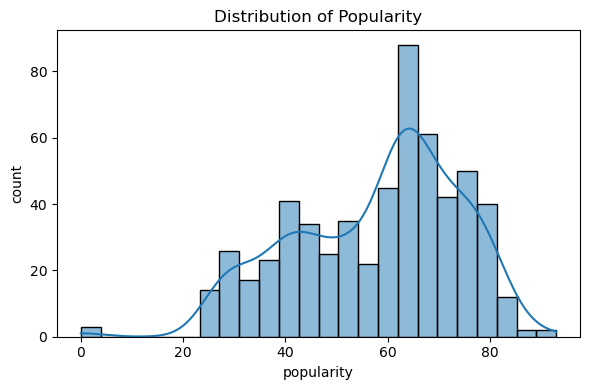

In [87]:
# Popularity Distribution
plt.figure(figsize=(6,4))
sns.histplot(y, 
             bins=24, 
             kde=True
            )
plt.title("Distribution of Popularity")
plt.xlabel("popularity")
plt.ylabel("count")
plt.tight_layout()
plt.show()

The distribution appears approximately unimodal, with a noticeable concentration of songs having popularity scores between 40 and 80, and a distinct peak around 60–65. This indicates that the majority of Taylor Swift’s songs fall into the moderately to highly popular range on Spotify. There are few extremely low-popularity songs (close to 0–20) and very few at the top end (above 90). The shape of the curve suggests a slight right skew, which may represent early or less-streamed songs, deep album tracks, or songs that are not on major playlists. Overall, this distribution shows a healthy variability in popularity, which is good for predictive modeling, as the target variable is not constant and provides enough spread for a regression model to learn meaningful patterns.

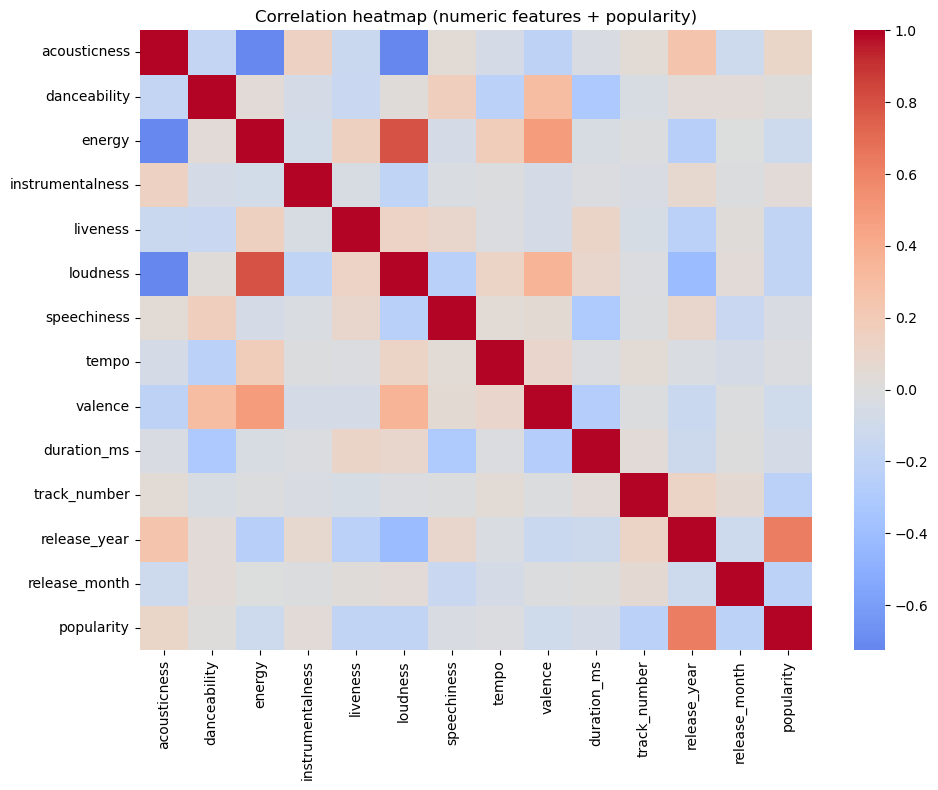

In [89]:
# Plot correlations
corr_cols = [c for c in num_features if pd.api.types.is_numeric_dtype(X[c])]

if len(corr_cols) > 1:
    plt.figure(figsize=(10,8))
    corr = df[corr_cols + [target]].corr(numeric_only=True)
    sns.heatmap(corr, 
                cmap="coolwarm", 
                center=0, 
                annot=False
               )
    plt.title("Correlation heatmap (numeric features + popularity)")
    plt.tight_layout()
    plt.show()

Several patterns emerge from the heatmap. Loudness and energy are strongly positively correlated, which makes intuitive sense because louder songs tend to have higher energy levels. Acousticness shows a negative correlation with both energy and loudness, meaning that more acoustic songs are typically quieter and less energetic. Valence, which measures the musical positivity or happiness of a track, displays a moderate positive correlation with energy and danceability, suggesting that upbeat, high-energy songs tend to sound happier and more danceable.

Popularity, shown along the bottom row, does not have a single strong linear relationship with any one feature, although it does appear to have slight positive correlations with valence, danceability, and energy, and possibly a weak negative correlation with acousticness. This implies that more energetic, upbeat, and danceable tracks tend to perform slightly better in terms of popularity, while softer and more acoustic songs may be less popular on average. The release year also has a small positive correlation with popularity, suggesting that newer songs might generally receive more streams or attention, possibly due to recency bias or Spotify’s algorithmic promotion of recent releases.

Overall, this heatmap indicates that song popularity cannot be explained by any single attribute alone. Instead, it is likely influenced by a combination of factors such as energy, valence, and danceability. This finding supports the use of multivariate modeling approaches, like Random Forest or Gradient Boosting, which are capable of capturing complex, non-linear relationships and the combined influence of multiple features on a song’s popularity.

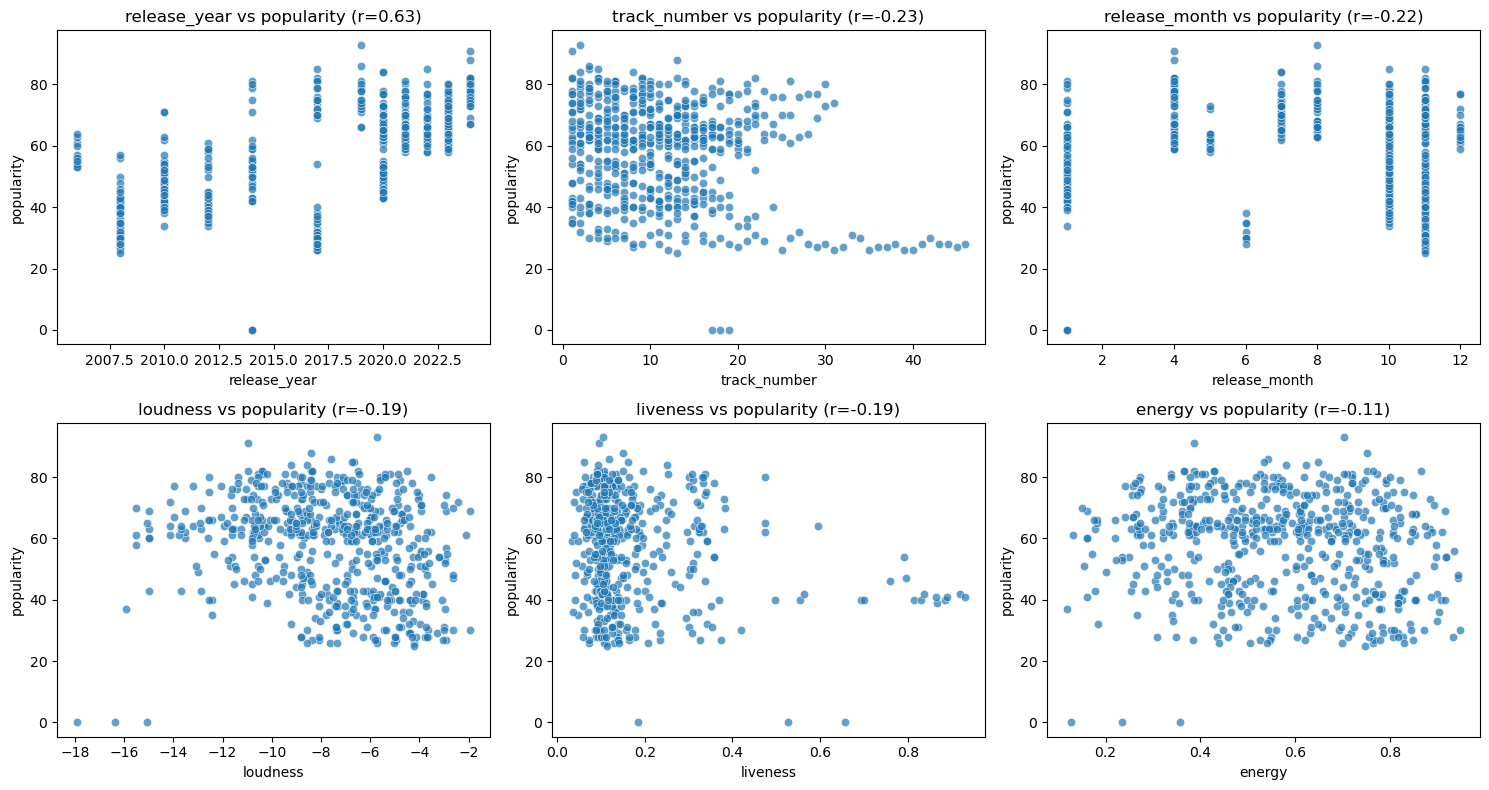

In [91]:
# Top relationships (by abs corr)
if len(corr_cols) > 0:
    cvec = [(c, df[c].corr(y)) for c in corr_cols]
    cvec = [t for t in cvec if pd.notnull(t[1])]
    top6 = sorted(cvec, key=lambda t: abs(t[1]), reverse=True)[:6]
    n = len(top6)
    if n:
        ncols = 3; nrows = int(np.ceil(n/ncols))
        plt.figure(figsize=(15, 4*nrows))
        for i, (c, r) in enumerate(top6, 1):
            plt.subplot(nrows, ncols, i)
            sns.scatterplot(x=df[c], 
                            y=y, 
                            alpha=0.7
                           )
            plt.xlabel(c)
            plt.ylabel("popularity")
            plt.title(f"{c} vs popularity (r={r:.2f})")
        plt.tight_layout()
        plt.show()

The plots reveal that most variables have relatively weak linear correlations with popularity, though some trends stand out more clearly than others. The strongest relationship appears between release year and popularity (r = 0.63). This positive correlation indicates that newer songs tend to have higher popularity scores. This pattern suggests a recency effect, where Taylor Swift’s more recent releases receive more streams and engagement, likely due to increased visibility, fan growth, and Spotify’s algorithmic promotion of new music.

The track number and release month both show weak negative correlations with popularity (r = -0.23 and r = -0.22, respectively). Songs positioned earlier in an album tend to be slightly more popular than those later in the tracklist, which could reflect listener behavior, as many listeners start albums from the beginning and may not reach every song. The release month pattern, although subtle, might reflect seasonal variations or release strategies, with certain months yielding slightly more popular songs.

For the musical attributes, loudness and liveness both show weak negative correlations with popularity (r = -0.19). This suggests that louder or more “live-sounding” songs, such as concert recordings or tracks with audience noise, are slightly less popular than more polished studio recordings. Energy, meanwhile, has a very weak negative correlation (r = -0.11), implying that while energetic songs are common in Taylor Swift’s catalog, high energy alone does not guarantee higher popularity.

Overall, these plots confirm that no single musical feature strongly predicts popularity, but temporal factors, especially the release year, appear to play a much larger role. This supports the idea that external and contextual influences, such as marketing, fan base growth, and streaming algorithms, may have a stronger impact on popularity than musical characteristics alone.

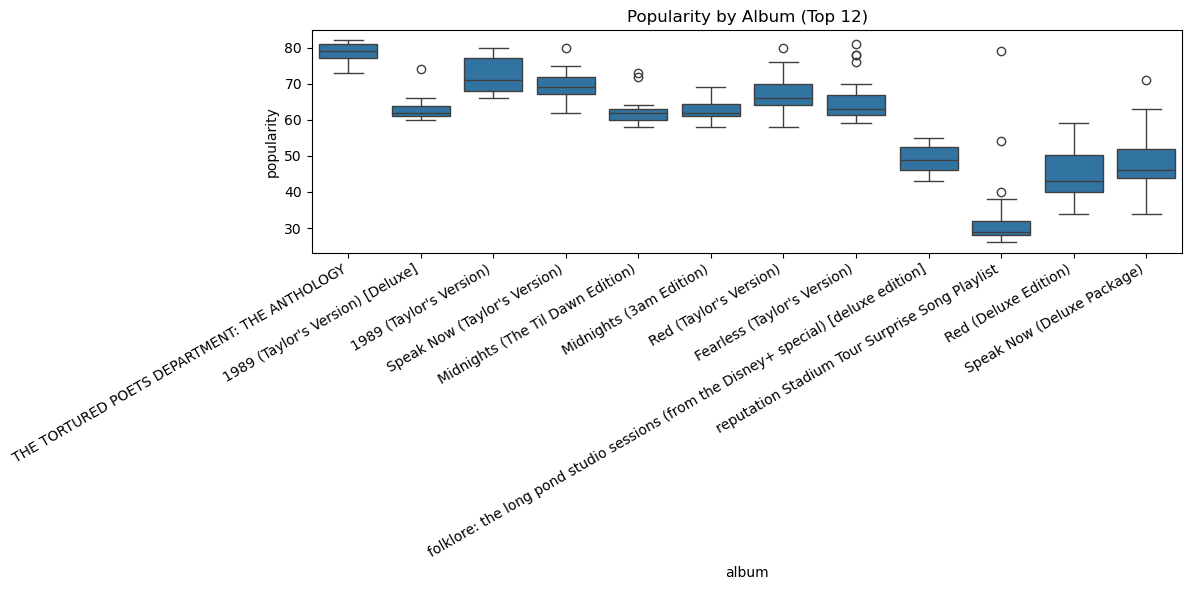

In [93]:
# Popularity by album (top 12 albums by track count)
top_albums = df["album"].value_counts().index[:12]

plt.figure(figsize=(12,6))
sns.boxplot(data=df[df["album"].isin(top_albums)], 
            x="album", 
            y="popularity"
           )
plt.title("Popularity by Album (Top 12)")
plt.xticks(rotation=30, 
           ha="right"
          )
plt.tight_layout()
plt.show()

Overall, the visualization shows clear differences in song popularity between albums. “THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY” and “1989 (Taylor’s Version) [Deluxe]” stand out as the most consistently popular albums, with higher medians and narrower interquartile ranges. This suggests that nearly all tracks from these albums perform well on Spotify, reflecting both their recent releases and strong fan engagement. In contrast, albums such as “Red (Deluxe Edition)” and “Speak Now (Deluxe Package)” have lower median popularity and wider variability, indicating that only a few songs from those editions achieve high streaming numbers.

Albums like “Midnights (The Til Dawn Edition)” and “Speak Now (Taylor’s Version)” show moderately high popularity but with more spread, meaning they contain both major hits and less-streamed tracks. The presence of high medians for newer albums reinforces the earlier observation that recency is an important factor influencing popularity. Newer releases benefit from algorithmic promotion, social media buzz, and streaming platform visibility.

In summary, this visualization suggests that Taylor Swift’s most recent albums tend to have consistently high popularity across tracks, while some of her earlier or reissued albums show greater variation in listener engagement. This pattern likely reflects both the growth of her audience over time and Spotify’s preference for promoting newly released music.

# Modeling

In [96]:
# Modeling pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)
    ],
    remainder="drop"
)

In [98]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [100]:
# Candidate models
models = {
    # Ridge Regression
    "Ridge": (
        Ridge(random_state=42),
        {"est__alpha": [0.1, 1.0, 5.0, 10.0]}  # test a few levels of regularization
    ),

    # Random Forest Regressor
    "RandomForest": (
        RandomForestRegressor(random_state=42),
        {"est__n_estimators": [300, 600],       # number of trees in the forest
         "est__max_depth": [None, 8, 12],       # limit on tree depth (None = fully grown)
         "est__min_samples_leaf": [1, 3]}       # min number of samples in a leaf node
    ),

    # Gradient Boosting Regressor
    "GradientBoosting": (
        GradientBoostingRegressor(random_state=42),
        {"est__n_estimators": [300, 600],       # number of boosting stages
         "est__learning_rate": [0.03, 0.06],    # controls contribution of each tree
         "est__max_depth": [2, 3]}              # depth of each individual tree
    )
}

In [102]:
# Store model evaluation results in this list for later comparison
results = []

In [104]:
# Define 5-fold cross-validation strategy to get reliable performance estimates
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [106]:
# Loop through each model, run GridSearchCV, evaluate results
for name, (est, grid) in models.items():
    # Create a pipeline that includes preprocessing and the estimator.
    pipe = Pipeline(steps=[("prep", preprocess), ("est", est)])

    # GridSearchCV systematically tests combinations of hyperparameters
    # using cross-validation to find the best settings for each model
    gscv = GridSearchCV(
        pipe,
        param_grid=grid,
        scoring="neg_root_mean_squared_error",  # minimize RMSE
        cv=cv,
        n_jobs=-1,  # use all CPU cores
        verbose=0
    )

    # Fit the grid search on the training set
    gscv.fit(X_train, y_train)

    # Retrieve the best version of the model
    best = gscv.best_estimator_

    # Evaluate the model on the test set to see real-world performance
    y_pred = best.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae  = mean_absolute_error(y_test, y_pred)
    r2   = r2_score(y_test, y_pred)

    # Record results for comparison
    results.append({
        "model": name,
        "best_params": gscv.best_params_,
        "cv_best_neg_rmse": float(gscv.best_score_),
        "test_rmse": float(rmse),
        "test_mae": float(mae),
        "test_r2": float(r2),
        "fitted": best
    })

In [108]:
# Summarize results across all models
# Create a clean summary DataFrame of all models and metrics
res_df = pd.DataFrame([{
    "Model": r["model"],
    "CV Best (neg RMSE)": r["cv_best_neg_rmse"],
    "Test RMSE": r["test_rmse"],
    "Test MAE": r["test_mae"],
    "Test R2": r["test_r2"],
    "Best Params": r["best_params"]
} for r in results]).sort_values("Test RMSE")

In [110]:
# Display the results table for easy comparison
display(res_df)

,Model,CV Best (neg RMSE),Test RMSE,Test MAE,Test R2,Best Params
2,GradientBoosting,-6.446332,5.718012,4.252743,0.860108,"{'est__learning_rate': 0.03, 'est__max_depth':..."
1,RandomForest,-6.669292,6.006642,4.341040,0.845629,"{'est__max_depth': None, 'est__min_samples_lea..."
0,Ridge,-6.872153,6.219442,4.328429,0.834497,{'est__alpha': 0.1}


In [112]:
# Identify the best-performing model (lowest test RMSE)
best_run = sorted(results, key=lambda d: d["test_rmse"])[0]
final_model = best_run["fitted"]

In [114]:
# Print the final evaluation summary
print(f"\nBest model: {best_run['model']}")
print("Best params:", best_run["best_params"])
print(f"Test RMSE: {best_run['test_rmse']:.3f} | "
      f"MAE: {best_run['test_mae']:.3f} | "
      f"R²: {best_run['test_r2']:.3f}")


Best model: GradientBoosting
Best params: {'est__learning_rate': 0.03, 'est__max_depth': 2, 'est__n_estimators': 600}
Test RMSE: 5.718 | MAE: 4.253 | R²: 0.860


The best model found through cross-validation was Gradient Boosting, which performed the strongest among the tested models (Ridge Regression, Random Forest, and Gradient Boosting). Its optimal hyperparameters were a learning rate of 0.03, a maximum tree depth of 2, and 600 estimators. This configuration indicates that the model builds many shallow trees that learn gradually from errors, leading to a stable and generalizable fit rather than overfitting to the training data.

In terms of performance metrics, the model achieved a Root Mean Squared Error (RMSE) of 5.718, a Mean Absolute Error (MAE) of 4.253, and an R² score of 0.860 on the test set. These values demonstrate that the model predicts song popularity with high accuracy. The RMSE and MAE suggest that, on average, the model’s predictions deviate from the actual popularity values by roughly 4 to 6 points. The R² value of 0.86 means that approximately 86% of the variance in song popularity can be explained by the model’s input features, which is a strong result for real-world data of this nature.

Overall, this outcome indicates that Gradient Boosting captures the underlying relationships between Taylor Swift’s song attributes and their Spotify popularity effectively. It outperforms simpler models by leveraging multiple weak learners and adjusting iteratively to reduce error, resulting in both high predictive power and reliable generalization to unseen data.